In [66]:
import pandas as pd
import numpy as np
import sys

### Dataset
https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [12]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [16]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 header=None, names=cols)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [19]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,2,small,high,unacc
freq,432,432,432,576,576,576,1210


In [20]:
np.unique(df['buying'])

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [24]:
df['buying'].value_counts()

high     432
med      432
low      432
vhigh    432
Name: buying, dtype: int64

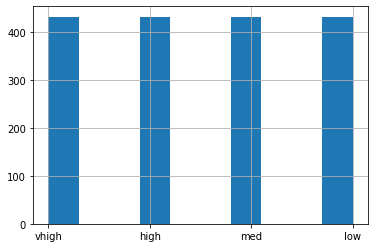

In [26]:
df['buying'].hist();

In [28]:
for col in df:
    print(f'{col}: {np.unique(df[col])}')

buying: ['high' 'low' 'med' 'vhigh']
maint: ['high' 'low' 'med' 'vhigh']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['big' 'med' 'small']
safety: ['high' 'low' 'med']
class: ['acc' 'good' 'unacc' 'vgood']


In [38]:
def cat2numeric_map(df):
    map_replace = {}
    for column in df:
        if not np.issubdtype(df[column].dtype, np.number):
            elements = np.unique(df[column])
            map_replace[column] = { elements[i]: i for i in range(elements.size) }  
    return map_replace

In [39]:
map_replace = cat2numeric_map(df)
map_replace

{'buying': {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3},
 'class': {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3},
 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
 'lug_boot': {'big': 0, 'med': 1, 'small': 2},
 'maint': {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3},
 'persons': {'2': 0, '4': 1, 'more': 2},
 'safety': {'high': 0, 'low': 1, 'med': 2}}

In [35]:
map_replace = {
    'buying': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'maint': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'doors': {'2': 2, '3': 3, '4': 4, '5more': 5},
    'persons': {'2': 2, '4': 4, 'more': 5},
    'lug_boot': {'small': 0, 'med': 1, 'big': 2 },
    'safety': {'low': 0, 'med': 1, 'high': 2},
    'class': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
}

In [60]:
df_convertido = df.replace(map_replace)
df_convertido

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [61]:
df_convertido.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [62]:
def reduce_mem_usage_automatic(df):
    """Reduces the memory usage of the given dataframe.
    Parameter
    ---------
    df : dataframe
        The input data to which the operation of memory reduction will be performed.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if "int" in str(col_type):
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                df[col] = df[col].astype(np.uint8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                df[col] = df[col].astype(np.uint16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                df[col] = df[col].astype(np.uint32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)
            elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                df[col] = df[col].astype(np.uint64)
        elif col_type == np.float:
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

In [63]:
reduce_mem_usage_automatic(df_convertido)

Memory usage of dataframe is 0.09 MB
Memory usage after optimization is: 0.01 MB
Decreased by 87.4%


In [64]:
df_convertido

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [65]:
df_convertido.dtypes

buying      int8
maint       int8
doors       int8
persons     int8
lug_boot    int8
safety      int8
class       int8
dtype: object

In [67]:
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

def print_top_mem_vars(variables):
    """Usage: 
    mem.print_top_mem_vars(locals())
    mem.print_top_mem_vars(globals())
    """
    for name, size in sorted(((name, sys.getsizeof(value)) for name, value in variables.items()), key= lambda x: -x[1])[:10]:
        print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

In [70]:
print_top_mem_vars(locals())

                            df: 744.4 KiB
                           _16: 744.4 KiB
                            _9: 712.3 KiB
                           _13: 712.3 KiB
                            _8: 711.9 KiB
                           _32: 241.8 KiB
                            __: 12.0 KiB
                 df_convertido: 12.0 KiB
                           _36: 12.0 KiB
                           _43: 12.0 KiB


In [71]:
del(df, _16, _9, _13)